In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tabula
from sklearn.linear_model import LinearRegression
%matplotlib inline 

pd.set_option('display.max_columns', 500)

In [48]:
path = "../DF/CSV_Files/medic_calls.csv"
df = pd.read_csv(path)
df.head()

/Users/elliott/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3049: DtypeWarning: Columns (17,18) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,Unnamed: 0,unit_id,incident_number,call_type,call_date,received_dttm,entry_dttm,dispatch_dttm,response_dttm,on_scene_dttm,transport_dttm,hospital_dttm,call_final_disposition,available_dttm,address,city,zipcode_of_incident,station_area,box,original_priority,priority,final_priority,als_unit,call_type_group,unit_type,neighborhooods_-_analysis_boundaries
0,1,KM07,19118384.0,Medical Incident,10/02/2019,10/02/2019 11:51:00 PM,10/02/2019 11:52:30 PM,10/02/2019 11:52:43 PM,10/02/2019 11:53:18 PM,10/02/2019 11:57:59 PM,10/03/2019 12:41:08 AM,10/03/2019 01:05:39 AM,Code 2 Transport,10/03/2019 01:42:18 AM,1300 Block of LAKE ST,San Francisco,94118.0,31,7152,2,2,2.0,False,Non Life-threatening,PRIVATE,Seacliff
1,4,83,19118381.0,Medical Incident,10/02/2019,10/02/2019 11:33:58 PM,10/02/2019 11:36:27 PM,10/02/2019 11:36:46 PM,10/02/2019 11:37:06 PM,10/02/2019 11:45:55 PM,NaN,NaN,Unable to Locate,10/02/2019 11:57:27 PM,TURK ST/HYDE ST,San Francisco,94102.0,3,1554,2,2,2.0,True,Non Life-threatening,MEDIC,Tenderloin
2,9,94,19118376.0,Medical Incident,10/02/2019,10/02/2019 11:24:10 PM,10/02/2019 11:25:39 PM,10/02/2019 11:25:54 PM,10/02/2019 11:26:02 PM,10/02/2019 11:34:00 PM,NaN,NaN,Patient Declined Transport,10/02/2019 11:59:46 PM,0 Block of CLIPPER ST,San Francisco,94114.0,11,5536,2,2,2.0,True,Non Life-threatening,MEDIC,Noe Valley
3,13,82,19118377.0,Medical Incident,10/02/2019,10/02/2019 11:22:51 PM,10/02/2019 11:26:54 PM,10/02/2019 11:27:06 PM,10/02/2019 11:27:13 PM,10/02/2019 11:34:51 PM,10/03/2019 12:06:50 AM,10/03/2019 12:13:54 AM,Code 2 Transport,10/03/2019 12:46:37 AM,1700 Block of 15TH AVE,San Francisco,94122.0,22,7364,2,2,2.0,True,Non Life-threatening,MEDIC,Inner Sunset
4,14,62,19118375.0,Medical Incident,10/02/2019,10/02/2019 11:22:50 PM,10/02/2019 11:24:25 PM,10/02/2019 11:24:53 PM,10/02/2019 11:25:59 PM,10/02/2019 11:34:18 PM,10/02/2019 11:59:53 PM,10/03/2019 12:16:18 AM,Code 3 Transport,10/03/2019 12:50:58 AM,6600 Block of 3RD ST,San Francisco,94124.0,17,6575,2,2,2.0,True,Potentially Life-Threatening,MEDIC,Bayview Hunters Point


In [11]:
df['dispatch_dttm'] = pd.to_datetime(df['dispatch_dttm'])

In [12]:
df.index = df['dispatch_dttm']
df.reset_index
df.index.name = 'Date'

In [14]:
df = df[['call_type']]
df.head()

,call_type
Date,
2019-10-02 23:52:43,Medical Incident
2019-10-02 23:36:46,Medical Incident
2019-10-02 23:25:54,Medical Incident
2019-10-02 23:27:06,Medical Incident
2019-10-02 23:24:53,Medical Incident


In [15]:
newdf = df.resample('H').count()
newdf.head()

,call_type
Date,
2015-08-17 01:00:00,7
2015-08-17 02:00:00,5
2015-08-17 03:00:00,8
2015-08-17 04:00:00,5
2015-08-17 05:00:00,2


In [16]:
forPlot = newdf
forPlot = forPlot.loc['2016-09-01':'2019-09-01']
forPlot.head()

,call_type
Date,
2016-09-01 00:00:00,16
2016-09-01 01:00:00,6
2016-09-01 02:00:00,10
2016-09-01 03:00:00,9
2016-09-01 04:00:00,6


In [17]:
forPlot.tail()

,call_type
Date,
2019-09-01 19:00:00,25
2019-09-01 20:00:00,12
2019-09-01 21:00:00,12
2019-09-01 22:00:00,14
2019-09-01 23:00:00,20


10/7/19 1500 - Now we need to import the new weather data 

In [18]:
weather = pd.read_csv('/Users/elliott/Documents/Personal_Projects/SF_EMS_Call_Vol/DF/CSV_Files/calls_weather_week.csv')

In [19]:
forPlot.shape

(26304, 1)

In [20]:
weather.head()

,Unnamed: 0,Date,Maximum,Minimum,Average,Precipitation,Weekday,weekday_num,Dispatched_calls,Holidays,Hol_weekend
0,0,2016-09-01,68,58,63.0,0.0,Thursday,3,347,0,0
1,1,2016-09-02,71,55,63.0,0.0,Friday,4,401,0,1
2,2,2016-09-03,66,57,61.5,0.0,Saturday,5,341,0,1
3,3,2016-09-04,67,56,61.5,0.0,Sunday,6,317,0,1
4,4,2016-09-05,72,53,62.5,0.0,Monday,0,328,1,1


In [21]:
weather = weather.set_index('Date')
weather = weather.drop(columns = ['Unnamed: 0'])
weather.head()

,Maximum,Minimum,Average,Precipitation,Weekday,weekday_num,Dispatched_calls,Holidays,Hol_weekend
Date,,,,,,,,,
2016-09-01,68,58,63.0,0.0,Thursday,3,347,0,0
2016-09-02,71,55,63.0,0.0,Friday,4,401,0,1
2016-09-03,66,57,61.5,0.0,Saturday,5,341,0,1
2016-09-04,67,56,61.5,0.0,Sunday,6,317,0,1
2016-09-05,72,53,62.5,0.0,Monday,0,328,1,1


In [22]:
weather.index = pd.to_datetime(weather.index)
weather.index

DatetimeIndex(['2016-09-01', '2016-09-02', '2016-09-03', '2016-09-04',
               '2016-09-05', '2016-09-06', '2016-09-07', '2016-09-08',
               '2016-09-09', '2016-09-10',
               ...
               '2019-09-21', '2019-09-22', '2019-09-23', '2019-09-24',
               '2019-09-25', '2019-09-26', '2019-09-27', '2019-09-28',
               '2019-09-29', '2019-09-30'],
              dtype='datetime64[ns]', name='Date', length=1125, freq=None)

In [23]:
weather.isna().sum()

Maximum              0
Minimum              0
Average              0
Precipitation       20
Weekday              0
weekday_num          0
Dispatched_calls     0
Holidays             0
Hol_weekend          0
dtype: int64

In [24]:
weather['Precipitation'] = weather['Precipitation'].fillna(weather['Precipitation'].mean())

In [25]:
weather.isna().sum()

Maximum             0
Minimum             0
Average             0
Precipitation       0
Weekday             0
weekday_num         0
Dispatched_calls    0
Holidays            0
Hol_weekend         0
dtype: int64

In [26]:
weather['Precipitation'] = weather['Precipitation'].astype(float)

In [27]:
weather.dtypes

Maximum               int64
Minimum               int64
Average             float64
Precipitation       float64
Weekday              object
weekday_num           int64
Dispatched_calls      int64
Holidays              int64
Hol_weekend           int64
dtype: object

In [28]:
weather = weather.resample('H').pad()

In [29]:
weather = weather.loc['2016-09-01':'2019-09-01']

In [30]:
dfTot = forPlot.merge(weather, left_on='Date', right_on='Date')
dfTot.rename(columns= {'call_type': 'HourlyCalls' }, inplace = True)
dfTot['Hour'] = dfTot.index.hour
dfTot.head()

,HourlyCalls,Maximum,Minimum,Average,Precipitation,Weekday,weekday_num,Dispatched_calls,Holidays,Hol_weekend,Hour
Date,,,,,,,,,,,
2016-09-01 00:00:00,16,68,58,63.0,0.0,Thursday,3,347,0,0,0
2016-09-01 01:00:00,6,68,58,63.0,0.0,Thursday,3,347,0,0,1
2016-09-01 02:00:00,10,68,58,63.0,0.0,Thursday,3,347,0,0,2
2016-09-01 03:00:00,9,68,58,63.0,0.0,Thursday,3,347,0,0,3
2016-09-01 04:00:00,6,68,58,63.0,0.0,Thursday,3,347,0,0,4


Step 1: Gather data.

We will use pandas groupby method to summarize the immigration data by Continent. The general process of groupby involves the following steps:

Split: Splitting the data into groups based on some criteria.
Apply: Applying a function to each group independently:
.sum()
.count()
.mean() 
.std() 
.aggregate()
.apply()
.etc..
Combine: Combining the results into a data structure. FROM IBM Data Visualization with Python

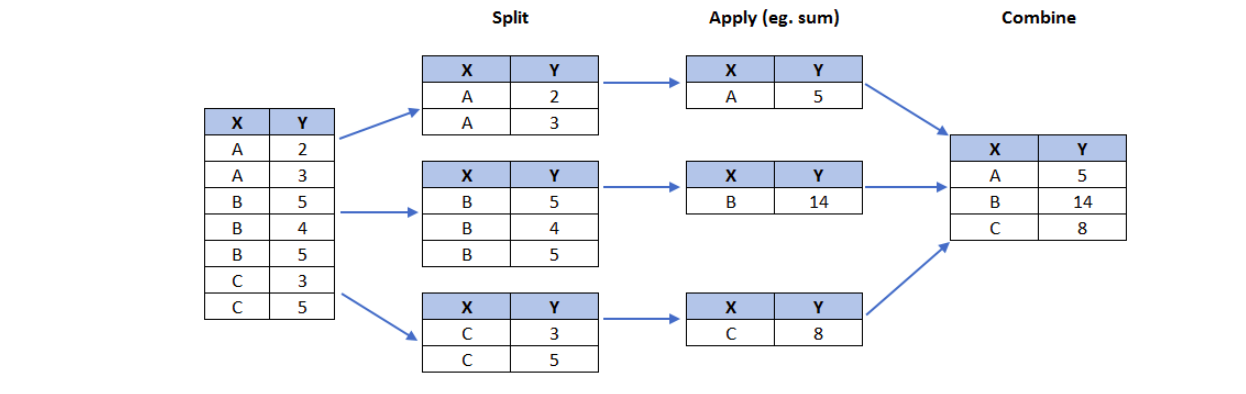

In [31]:
dfw = dfTot['Dispatched_calls'].groupby(dfTot['weekday_num']).mean()

[]

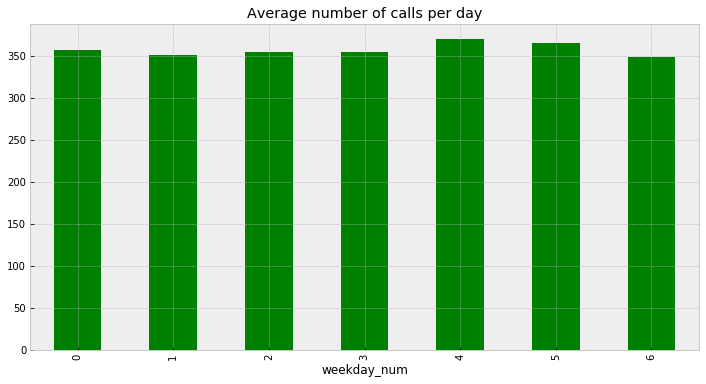

In [32]:
plt.style.use('bmh')
dfw.plot(kind='bar', figsize=(12,6), color ='green')
plt.title('Average number of calls per day')
plt.plot()

In [33]:
dfh = dfTot['HourlyCalls'].groupby(dfTot['Hour']).sum()

[]

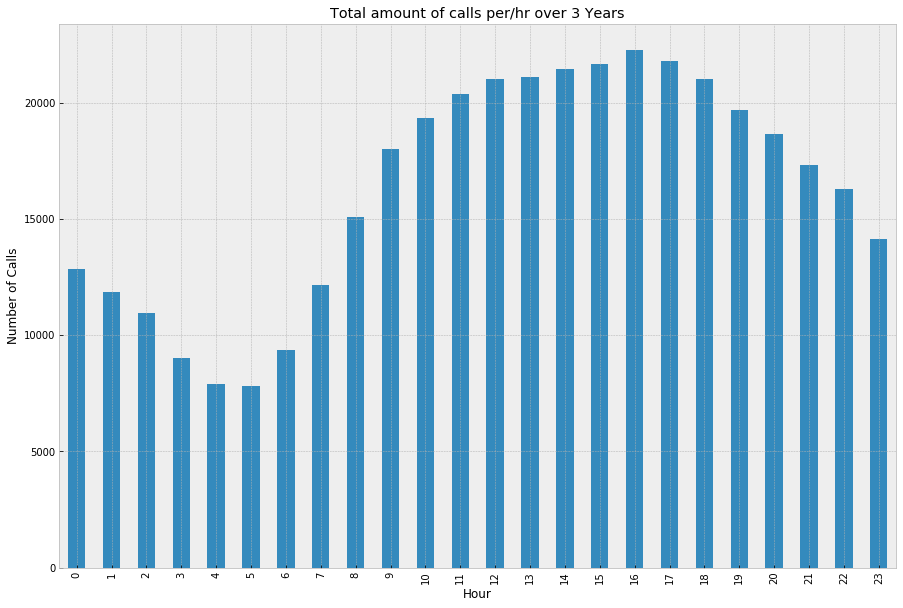

In [34]:
dfh.plot(kind='bar', figsize=(15,10))
plt.title('Total amount of calls per/hr over 3 Years')
plt.ylabel('Number of Calls')
plt.plot()

In [35]:
dummy = pd.get_dummies(dfTot['Weekday'])
dummy = dummy[['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']]
dfTotal = dfTot.merge(dummy, left_on='Date', right_on='Date')

In [36]:
dfTotal['Month']=dfTotal.index.month_name()
dummies = pd.get_dummies(dfTotal['Month'])
dummies = dummies[['January','February','March','April','May','June','July','August','September','October','November','December']]
dfTotal = dfTotal.merge(dummies, left_on='Date', right_on='Date')

In [37]:
dummyHour = pd.get_dummies(dfTotal['Hour'])
dfTotal = dfTotal.merge(dummyHour, left_on='Date', right_on='Date')

In [38]:
dfTotal.drop(['weekday_num','Weekday','Month','Hour'],axis=1, inplace=True)
dfTotal.head()

,HourlyCalls,Maximum,Minimum,Average,Precipitation,Dispatched_calls,Holidays,Hol_weekend,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday,Sunday,January,February,March,April,May,June,July,August,September,October,November,December,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2016-09-01 00:00:00,16,68,58,63.0,0.0,347,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2016-09-01 01:00:00,6,68,58,63.0,0.0,347,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2016-09-01 02:00:00,10,68,58,63.0,0.0,347,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2016-09-01 03:00:00,9,68,58,63.0,0.0,347,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2016-09-01 04:00:00,6,68,58,63.0,0.0,347,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


When first working on the data, there was missing data at '01-10-19' and '01-11-19.' I originally filled this data with a 1 value, but I will change it to the average call hourly call volume. 

In [39]:
dfTotal['HourlyCalls'].loc['01-10-19':'01-11-19'] = dfTotal['HourlyCalls'].mean()

/Users/elliott/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


In [40]:
dfTotal = dfTotal.assign(Bins = lambda x: np.ceil(x.HourlyCalls/56 * 7))
dfTotal.Bins = dfTotal.Bins.astype(int)

In [693]:
dfTotal.to_csv(r'/Users/elliott/Documents/Personal_Projects/SF_EMS_Call_Vol/DF/CSV_Files/hourly_EMS.csv')

Let's run a quick linear regress on our new and improved data frame and see what we get. 

In [41]:
lmdf =  dfTotal.drop(['HourlyCalls','Dispatched_calls','Bins'],axis=1)
Z = lmdf
y = dfTotal['HourlyCalls']

In [42]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge
from sklearn.linear_model import RidgeCV
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import cross_val_score

def linRegress(Z,y):
    lm = LinearRegression(normalize=True)
    y.values.reshape(-1,1)
    Z.values.reshape(-1,len(Z.columns))
    lm.fit(Z,y)
    return 'LinearRegress R^2 without test_train_split or CV',lm.score(Z,y)

def linRegressTTS(Z,y):
    X_train, X_test, y_train, y_test = train_test_split(Z, y, test_size=0.33, random_state=42)
    lm = LinearRegression(normalize=True)
    lm.fit(X_train,y_train)
    score = lm.score(X_test,y_test)
    y_pred = lm.predict(X_test)
    df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
    print('Comparing results of Test_train_split linearRegress:\n', df.head(8))
    print('Max Average Error of linRegressTTS:',mean_absolute_error(y_test, y_pred))
    return 'R^2 score of linRegressTTS:',score

def linRegressCV(Z,y):
    lm = LinearRegression(normalize=True)
    scores = cross_val_score(lm, Z, y, cv=5)
    return "Crossval of linRegress= ",scores.mean()

def ridgeRegress(Z,y):
    X_train, X_test, y_train, y_test = train_test_split(Z, y, test_size=0.33, random_state=42)
    rr = Ridge(alpha=.001,normalize=True)
    rr.fit(X_train, y_train)
    y_pred = rr.predict(X_test)
    score = rr.score(X_test,y_test)
    print('Max Average Error of ridgeRegress=',mean_absolute_error(y_test, y_pred))
    return 'R^2 score of ridgeRegress=',score

def ridgeRegressCV(Z,y):
    rr = RidgeCV(alphas=[.001,.01,.1,1,10,100,1000],normalize=True,cv=5).fit(Z,y)
    score = rr.score(Z,y)
    return 'R^2 score of ridgeRegressCV=',score
    
def regress(Z,y):
    print(linRegress(Z,y))
    print(linRegressCV(Z,y))
    print(linRegressTTS(Z,y))
    print(ridgeRegressCV(Z,y))
    print(ridgeRegress(Z,y))

regress(Z,y)

('LinearRegress R^2 without test_train_split or CV', 0.49448202812360104)
('Crossval of linRegress= ', 0.48698152071311795)
Comparing results of Test_train_split linearRegress:
                      Actual  Predicted
Date                                  
2017-04-06 03:00:00     4.0   8.208740
2019-08-29 23:00:00    13.0  13.224365
2016-12-24 16:00:00    22.0  20.427490
2017-01-28 16:00:00    23.0  20.599365
2017-03-13 07:00:00    14.0  12.693115
2017-08-30 23:00:00    14.0  12.614990
2017-09-01 09:00:00    25.0  20.427490
2019-07-26 18:00:00    24.0  18.927490
Max Average Error of linRegressTTS: 3.53974366309434
('R^2 score of linRegressTTS:', 0.49546414156997043)
('R^2 score of ridgeRegressCV=', 0.4944704304521144)
Max Average Error of ridgeRegress= 3.539122056107422
('R^2 score of ridgeRegress=', 0.49533909631036865)


In [699]:
yNN = dfTotal['Bins']
X_train, X_test, y_train, y_test = train_test_split(Z, yNN, test_size=0.33, random_state=42)

In [700]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)

/Users/elliott/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)


StandardScaler(copy=True, with_mean=True, with_std=True)

In [701]:
# Now apply the transformations to the data:
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

/Users/elliott/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  
/Users/elliott/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  This is separate from the ipykernel package so we can avoid doing imports until


In [702]:
from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier(hidden_layer_sizes=(30,30,30))
mlp.fit(X_train,y_train)

/Users/elliott/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(30, 30, 30), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
       random_state=None, shuffle=True, solver='adam', tol=0.0001,
       validation_fraction=0.1, verbose=False, warm_start=False)

In [703]:
predictions = mlp.predict(X_test)

In [704]:
from sklearn.metrics import classification_report
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         4
           1       0.62      0.48      0.54      1588
           2       0.54      0.63      0.58      3810
           3       0.52      0.57      0.54      2674
           4       0.33      0.08      0.12       565
           5       0.17      0.03      0.05        35
           6       0.00      0.00      0.00         4
           7       0.00      0.00      0.00         1

   micro avg       0.54      0.54      0.54      8681
   macro avg       0.27      0.22      0.23      8681
weighted avg       0.53      0.54      0.53      8681



/Users/elliott/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [705]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(random_state=42,solver='saga',multi_class='multinomial',max_iter=1000, penalty='l2')
clf.fit(X_train,y_train)
yhat = clf.predict(X_test)
clf.score(X_test,y_test)

0.5735514341665706

In [706]:
from sklearn.metrics import jaccard_similarity_score
jaccard_similarity_score(y_test, yhat)

0.5735514341665706

In [707]:
print (classification_report(y_test, yhat))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         4
           1       0.64      0.54      0.58      1588
           2       0.59      0.58      0.59      3810
           3       0.53      0.72      0.61      2674
           4       0.00      0.00      0.00       565
           5       0.00      0.00      0.00        35
           6       0.00      0.00      0.00         4
           7       0.00      0.00      0.00         1

   micro avg       0.57      0.57      0.57      8681
   macro avg       0.22      0.23      0.22      8681
weighted avg       0.54      0.57      0.55      8681



/Users/elliott/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [708]:
from sklearn.linear_model import SGDClassifier
clf = SGDClassifier(random_state=42,max_iter=1000,tol=1e-3)
clf.fit(Z, dfTotal['Bins'])
clf.score(Z,dfTotal['Bins'])

0.5644768856447688

In [709]:
from sklearn.svm import SVC
clf = SVC(random_state=42,max_iter=1000,tol=1e-3,gamma='auto')
clf.fit(Z, dfTotal['Bins'])
clf.score(Z,dfTotal['Bins'])

/Users/elliott/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:244: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


0.3897125912408759